In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
from utils.utils import show_pictures,create_folder
from estimator.estimatorUtils import Save_model,Save_images,LearningRateScheduler,lr_schedule
from estimator.estimator import WGAN_GP

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
batch_size = 100

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
        "data",      
        target_size=(48, 48),
        batch_size=batch_size, 
        class_mode = None,
        shuffle = True
        )

Found 63565 images belonging to 1 classes.


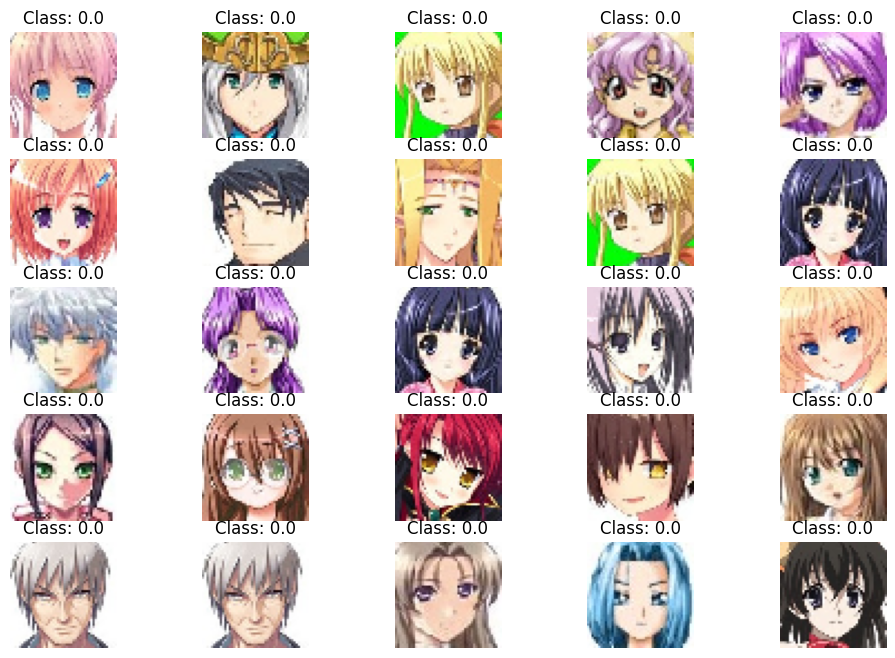

In [6]:
show_pictures(next(train_generator),np.zeros(shape= (batch_size)))

In [7]:
sm = Save_model(1,"tmp")
si = Save_images(1,"tmp",10)
lr = LearningRateScheduler(lr_schedule, lr_schedule)

In [8]:
opt1 = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9)
opt2 = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9)

In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
model = WGAN_GP(z_dim = 15, critic_steps = 5, gp_weight = 10)

In [11]:
model.compile(critic_optimizer = opt1, generator_optimizer = opt2)

In [12]:
history = model.fit(train_generator, epochs = 5 ,batch_size = batch_size, callbacks = [sm,si,lr])

Generator lr in epoch 0 is 0.00019999999494757503
Critic lr in epoch 0 is 0.00019999999494757503
Epoch 1/5
636/636 [==============================] - ETA: 0s - generator_loss: -0.1998 - critic_loss: -31.2509 - critic_real_loss: -43.5921 - critic_fake_loss: 0.1954 - gp: 1.2146Saving weights
Saving optimizer weights


C:\Users\gonzalo\AppData\Roaming\Python\Python37\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Generating vector
Generating image
1/1 [==============================] - 0s 170ms/step
Saving image
636/636 [==============================] - 655s 1s/step - generator_loss: -0.1758 - critic_loss: -31.2251 - critic_real_loss: -43.5338 - critic_fake_loss: 0.1765 - gp: 1.2132
Generator lr in epoch 1 is 0.00019999999494757503
Critic lr in epoch 1 is 0.00019999999494757503
Epoch 2/5
636/636 [==============================] - ETA: 0s - generator_loss: 45.9368 - critic_loss: -13.4378 - critic_real_loss: 28.7600 - critic_fake_loss: -45.0475 - gp: 0.2850Saving weights
Saving optimizer weights
Generating vector
Generating image
1/1 [==============================] - 0s 12ms/step
Saving image
636/636 [==============================] - 624s 981ms/step - generator_loss: 45.9378 - critic_loss: -13.4348 - critic_real_loss: 28.7621 - critic_fake_loss: -45.0462 - gp: 0.2849
Generator lr in epoch 2 is 0.00019999999494757503
Critic lr in epoch 2 is 0.00019999999494757503
Epoch 3/5
636/636 [============

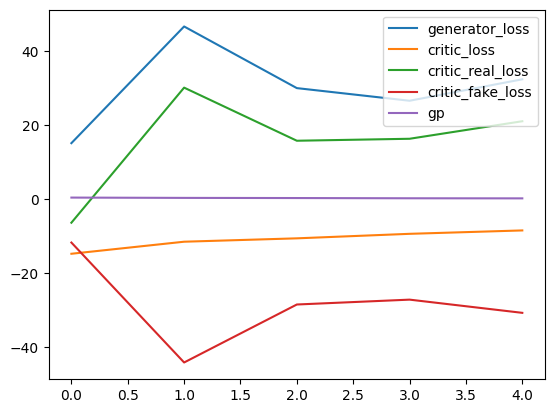

In [13]:
plt.plot(history.history["generator_loss"], label="generator_loss")
plt.plot(history.history["critic_loss"], label="critic_loss")
plt.plot(history.history["critic_real_loss"], label="critic_real_loss")
plt.plot(history.history["critic_fake_loss"], label="critic_fake_loss")
plt.plot(history.history["gp"], label="gp")
plt.legend(loc="upper right")
plt.savefig('losses.pdf')